# QDAC-II voltage sweep


In [1]:
from time import sleep
import numpy
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.17'
qdac = QDAC2.QDac2('QDAC', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
from qcodes.instrument_drivers.rigol import RigolDS1074Z
rigol_addr = '192.168.8.199'
scope = RigolDS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Connected to: QDevil QDAC-II (serial:3, firmware:10-1.4) in 0.22s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.05s


In [2]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [3]:
with qdac.ch03.dc_sweep(
    repetitions=2,
    start_V=-1,
    stop_V=1,
    points=11,
    dwell_s=10e-6
) as my_list:
    print(my_list.points())

11


In [4]:
scope.write('*rst')
qdac.reset()

In [5]:
# Connect scope ch 3 to qdac ch 3
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.5')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.2')
scope.write('tim:scal 20e-6')
scope.write('tim:offs 50e-6')

In [6]:
dc_sweep = qdac.ch03.dc_sweep(
    repetitions=2,
    start_V=-1,
    stop_V=1,
    points=11,
    dwell_s=10e-6
)
dc_sweep.points()

11

In [7]:
scope.write('sing')
sleep(3)
dc_sweep.start()

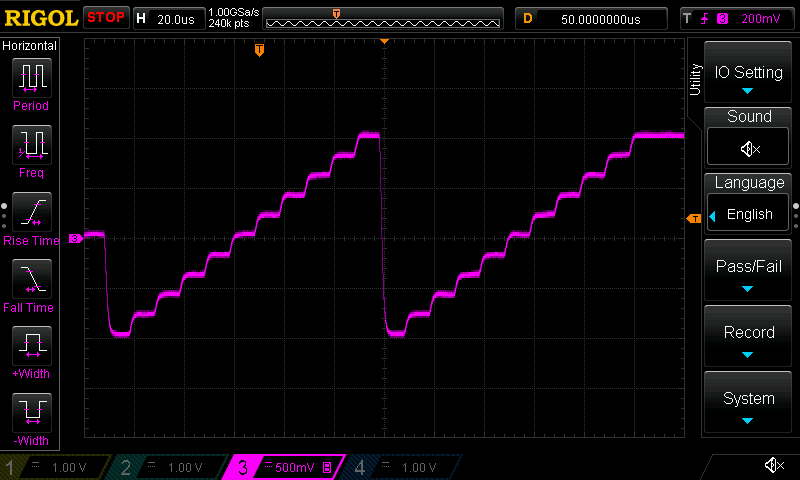

In [8]:
sleep(1)
capture()

In [8]:
scope.write('tim:scal 50e-6')
scope.write('run')

In [9]:
dc_sweep = qdac.ch03.dc_sweep(
    repetitions=-1,
    start_V=-1,
    stop_V=1,
    points=11,
    dwell_s=10e-6
)

In [10]:
scope.write('run')
dc_sweep.start()

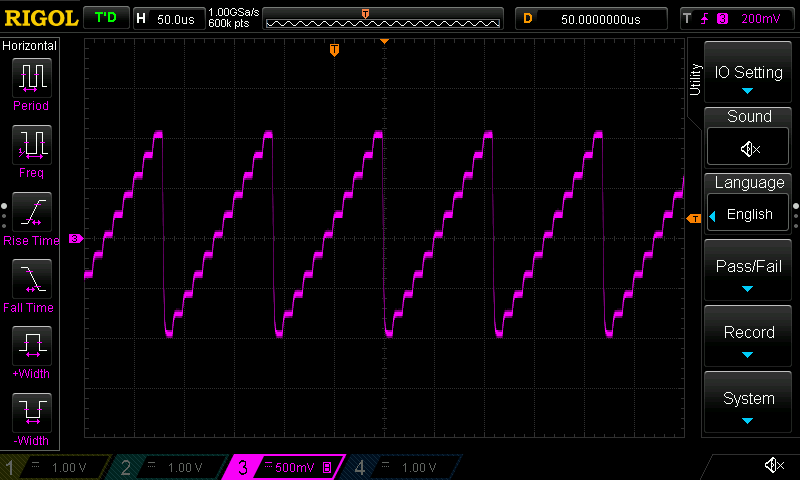

In [12]:
sleep(1)
capture()

In [11]:
scope.write('run')
sleep(2)
dc_sweep.abort()